In [95]:
import matplotlib.pyplot as plt
import numpy as np
a = np.array([[0, 0, 0, 0, 0], 
              [0, 1, 1, 0, 0.5], 
              [1, 0, 1, 0, 0.5]])

b = np.array([[0, 0, 0, 0, 0], 
              [0, 2, 2, 0, 0.5], 
              [2, 0, 2, 0, 0.5]])

c = np.array([[1, 0, 1, 0, 0.5], 
              [0, 0, 0, 0, 0], 
              [0, 1, 1, 0, 0.5]])

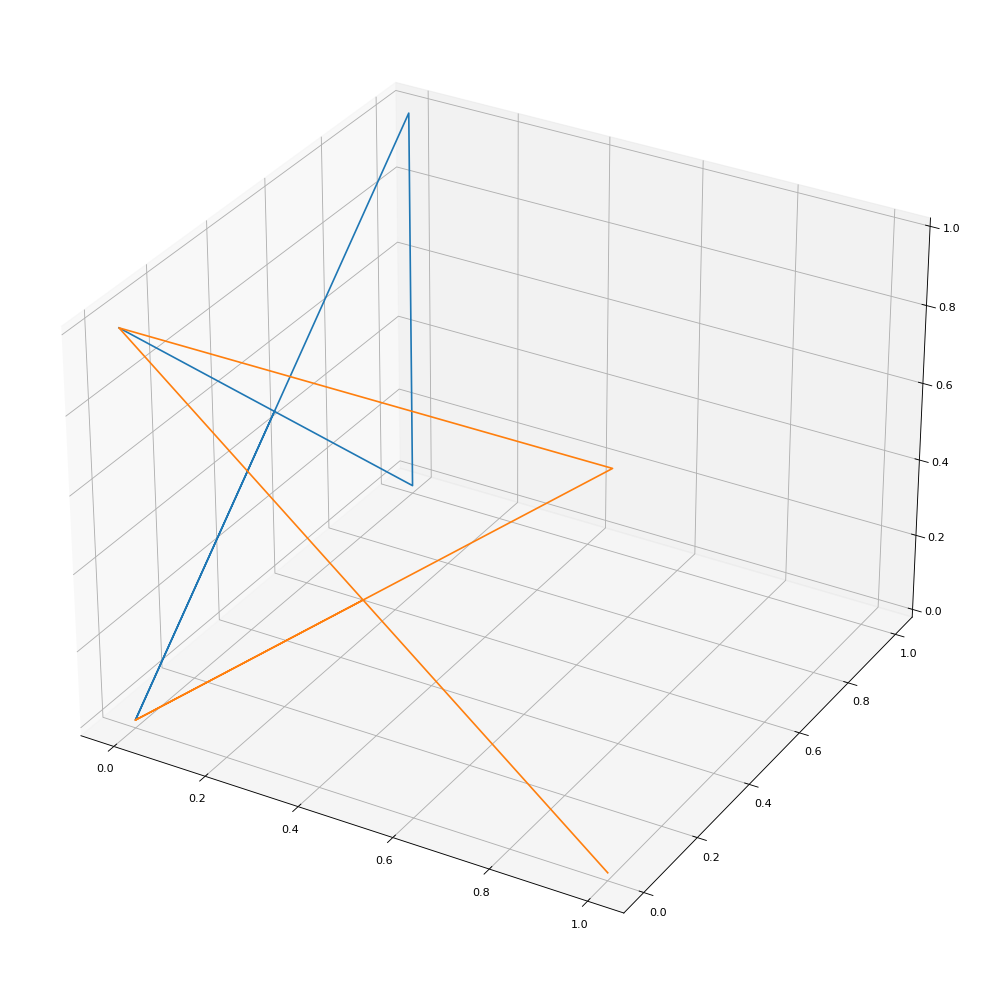

In [2]:

fig = plt.figure(figsize=(18, 16), dpi= 80,)
ax = fig.add_subplot(111, projection='3d')
ax.plot(*a)
# ax.plot(*b)
ax.plot(*c)

In [3]:
transform = np.array([[0, 0, 1],
                     [0, 0, 0],
                     [0, 1, 0]]).T
print(a)
print(np.matmul(transform, c))

[[0.  0.  0.  0.  0. ]
 [0.  1.  1.  0.  0.5]
 [1.  0.  1.  0.  0.5]]
[[0.  0.  0.  0.  0. ]
 [0.  1.  1.  0.  0.5]
 [1.  0.  1.  0.  0.5]]


In [4]:
q, r = np.linalg.qr(transform)
q

array([[ 0.,  0., -1.],
       [-0.,  1.,  0.],
       [-1.,  0.,  0.]])

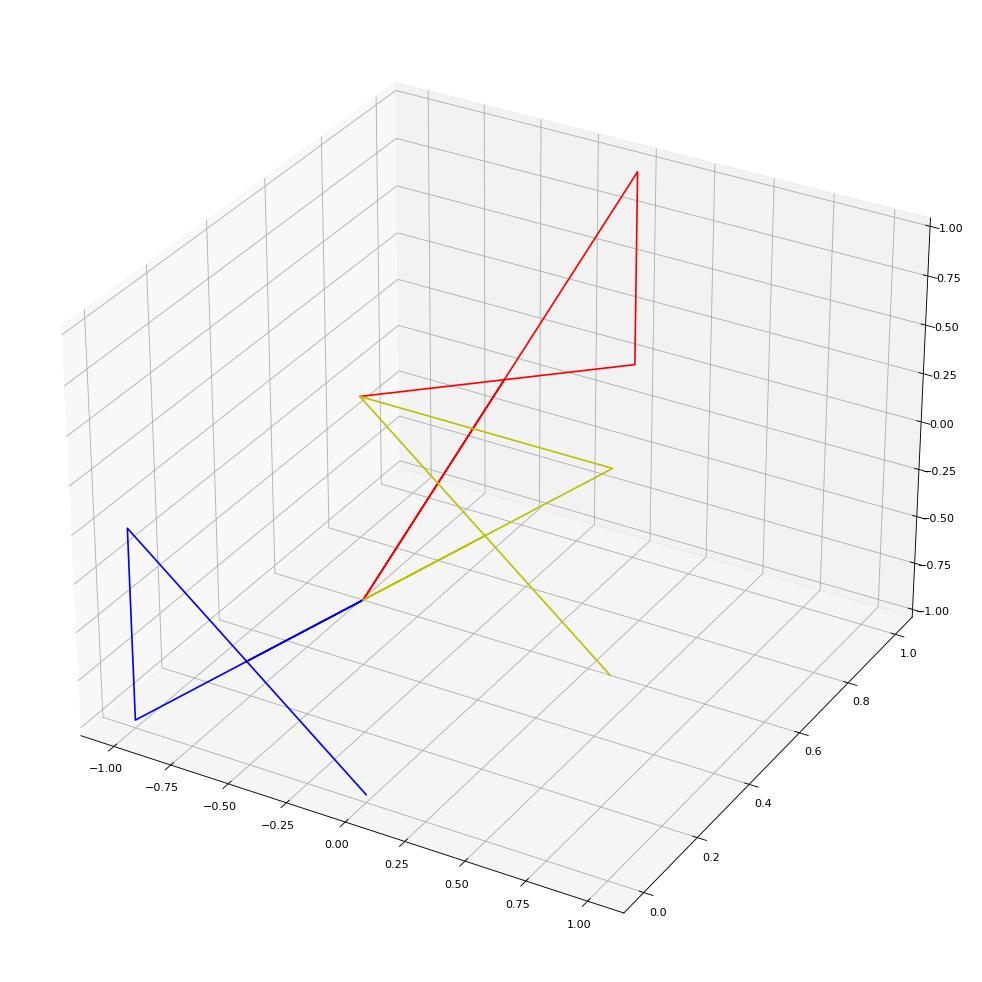

In [5]:
fig = plt.figure(figsize=(18, 16), dpi= 80,)
ax = fig.add_subplot(111, projection='3d')
ax.plot(*a, color="r")
# ax.plot(*b)
ax.plot(*np.matmul(q, c), color="b")
# ax.plot(*np.matmul(r, c), color="g")
ax.plot(*c, color="y")
plt.show()

In [6]:
first = np.array([[1, 0, 0],
                  [0, 0, 0],
                  [0, 1, 0]])
zeros = np.array([[1,0,0],
                 [0,0,0],
                 [0,1,0]])
np.matmul(zeros, first)

array([[1, 0, 0],
       [0, 0, 0],
       [0, 0, 0]])

In [47]:
a = np.array([[0, 0, 0, 0, 0], 
              [0, 1, 1, 0, 0.5], 
              [1, 0, 1, 0, 0.5]])
a_svd = np.linalg.svd(a)
c_svd = np.linalg.svd(c)
b_svd = np.linalg.svd(b)
d = a*2
d_svd = np.linalg.svd(d)
for i in range(len(a_svd)):
    print("first diff")
    print(a_svd[i])
    print("**"*10)
    print(c_svd[i])
    print("**"*10)
    print(b_svd[i])
    print("**"*10)
    print(d_svd[i])
    
    if c_svd[i].all() == a_svd[i].all():
        print("true")

first diff
[[ 0.          0.         -1.        ]
 [-0.70710678  0.70710678  0.        ]
 [-0.70710678 -0.70710678  0.        ]]
********************
[[-0.70710678 -0.70710678]
 [-0.70710678  0.70710678]]
********************
[[-0.70710678 -0.70710678]
 [-0.70710678  0.70710678]]
********************
[[ 0.          0.         -1.        ]
 [-0.70710678  0.70710678  0.        ]
 [-0.70710678 -0.70710678  0.        ]]
first diff
[ 1.87082869  1.         -0.        ]
********************
[1.87082869 1.        ]
********************
[3.53553391 2.        ]
********************
[ 3.74165739  2.         -0.        ]
first diff
[[-3.77964473e-01 -3.77964473e-01 -7.55928946e-01  0.00000000e+00
  -3.77964473e-01]
 [-7.07106781e-01  7.07106781e-01  1.17514767e-16  0.00000000e+00
   5.87573836e-17]
 [-5.97614305e-01 -5.97614305e-01  4.78091444e-01  0.00000000e+00
   2.39045722e-01]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00
   0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+

In [8]:
np.linalg.eig(np.dot(a, a.T).T)

(array([3.5, 1. , 0. ]),
 array([[ 0.        ,  0.        ,  1.        ],
        [ 0.70710678,  0.70710678,  0.        ],
        [ 0.70710678, -0.70710678,  0.        ]]))

In [9]:
np.linalg.eig(np.dot(d, d.T))

(array([14.,  4.,  0.]),
 array([[ 0.        ,  0.        ,  1.        ],
        [ 0.70710678,  0.70710678,  0.        ],
        [ 0.70710678, -0.70710678,  0.        ]]))

In [10]:
transform_matrix = [
    np.array([[0,0,2],
             [0,2,0],
             [2, 0,0]]),
    np.array([[1, 1, 0],
             [1, -1, 0],
             [0, 0, 1]]),
    np.array([[-2, 0, 0],
             [0, -2, 0],
             [0, 0, -1]])
]
eig_val, eig_vec = np.linalg.eig(np.dot(a, a.T))
print(eig_vec)
for i in transform_matrix:
    tmp = np.matmul(i, a)
    tmp_eig_val, tmp_eig_vec = np.linalg.eig(np.dot(tmp, tmp.T))
    print("***"*10)
    print(tmp_eig_vec)
    

[[ 0.          0.          1.        ]
 [ 0.70710678  0.70710678  0.        ]
 [ 0.70710678 -0.70710678  0.        ]]
******************************
[[ 0.70710678 -0.70710678  0.        ]
 [ 0.70710678  0.70710678  0.        ]
 [ 0.          0.          1.        ]]
******************************
[[-6.19857844e-01  7.07106781e-01 -3.40259097e-01]
 [ 6.19857844e-01  7.07106781e-01  3.40259097e-01]
 [-4.81199030e-01 -1.53117590e-16  8.76611370e-01]]
******************************
[[ 0.          0.          1.        ]
 [ 0.31340294 -0.94962024  0.        ]
 [-0.94962024 -0.31340294  0.        ]]


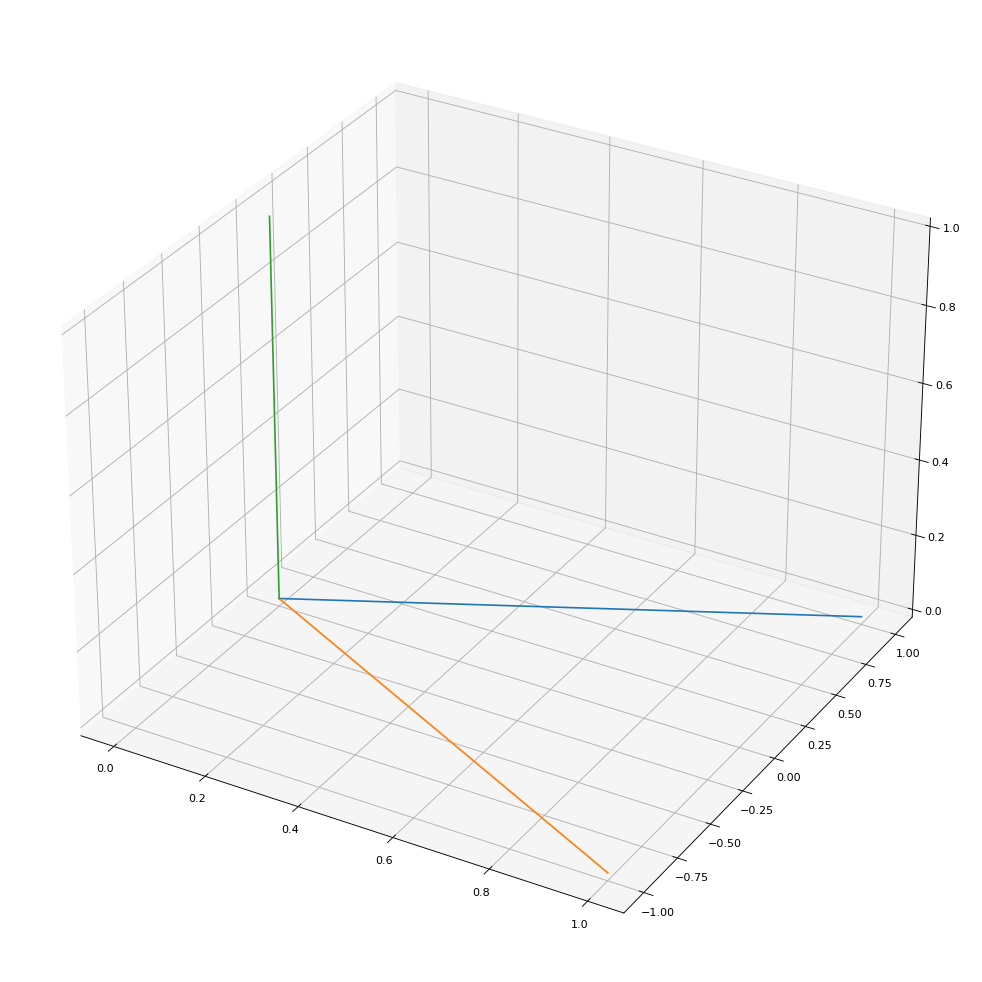

In [11]:
fig = plt.figure(figsize=(18, 16), dpi= 80,)
tmp = np.array([[1, 1, 0],
             [1, -1, 0],
             [0, 0, 1]])
ax = fig.add_subplot(111, projection='3d')

for i in tmp:
    ax.plot([0, i[0]], [0, i[1]], [0, i[2]])

In [12]:
np.linalg.pinv(a)


array([[ 0.        , -0.35714286,  0.64285714],
       [ 0.        ,  0.64285714, -0.35714286],
       [ 0.        ,  0.28571429,  0.28571429],
       [ 0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.14285714,  0.14285714]])

In [13]:
np.matmul(a, a.T)

array([[0.  , 0.  , 0.  ],
       [0.  , 2.25, 1.25],
       [0.  , 1.25, 2.25]])

In [14]:
np.matmul(c, c.T)

array([[2.25, 0.  , 1.25],
       [0.  , 0.  , 0.  ],
       [1.25, 0.  , 2.25]])

In [15]:
np.matmul(b, b.T)

array([[0.  , 0.  , 0.  ],
       [0.  , 8.25, 4.25],
       [0.  , 4.25, 8.25]])

In [16]:
np.matmul(d, d.T)


array([[0., 0., 0.],
       [0., 9., 5.],
       [0., 5., 9.]])

In [17]:
np.dot(a, a.T)

array([[0.  , 0.  , 0.  ],
       [0.  , 2.25, 1.25],
       [0.  , 1.25, 2.25]])

In [18]:
np.dot(c, c.T)

array([[2.25, 0.  , 1.25],
       [0.  , 0.  , 0.  ],
       [1.25, 0.  , 2.25]])

In [19]:
np.dot(b, b.T)

array([[0.  , 0.  , 0.  ],
       [0.  , 8.25, 4.25],
       [0.  , 4.25, 8.25]])

In [46]:
np.dot(d, d.T)
a

array([[0. , 1. , 1. , 0.5],
       [1. , 0. , 1. , 0.5]])

In [48]:
g = np.dot(transform_matrix[1], a) 
# np.linalg.eig(np.dot(g, g.T))
# np.linalg.svd(g)
g
# transform_matrix[1]

array([[ 0. ,  1. ,  1. ,  0. ,  0.5],
       [ 0. , -1. , -1. ,  0. , -0.5],
       [ 1. ,  0. ,  1. ,  0. ,  0.5]])

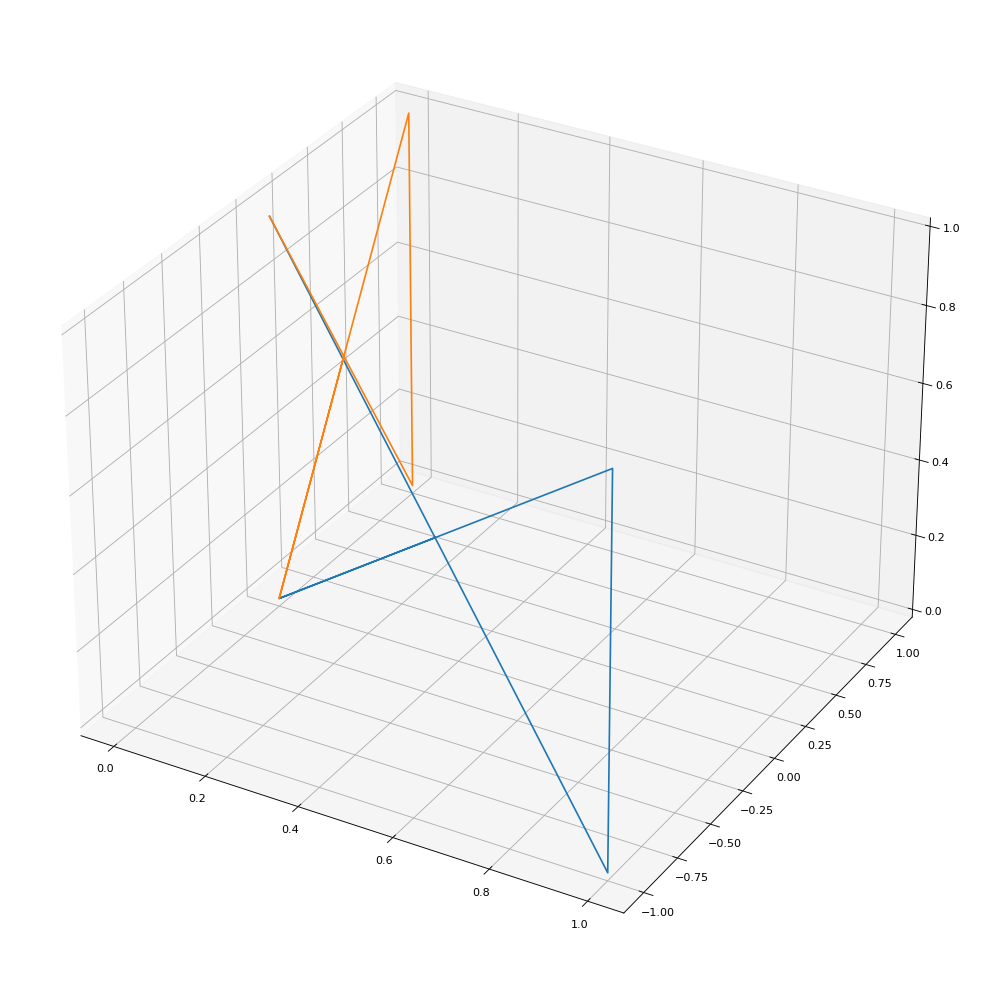

In [22]:
fig = plt.figure(figsize=(18, 16), dpi= 80,)
tmp = np.array([[1, 1, 0],
             [1, -1, 0],
             [0, 0, 1]])
ax = fig.add_subplot(111, projection='3d')

ax.plot(*g),
ax.plot(*a)

# for i in tmp:
#     ax.plot([0, i[0]], [0, i[1]], [0, i[2]])

In [24]:
np.dot(a.T, a)

array([[1. , 0. , 1. , 0. , 0.5],
       [0. , 1. , 1. , 0. , 0.5],
       [1. , 1. , 2. , 0. , 1. ],
       [0. , 0. , 0. , 0. , 0. ],
       [0.5, 0.5, 1. , 0. , 0.5]])

In [25]:
np.linalg.svd(a)

(array([[ 0.        ,  0.        , -1.        ],
        [-0.70710678,  0.70710678,  0.        ],
        [-0.70710678, -0.70710678,  0.        ]]),
 array([ 1.87082869,  1.        , -0.        ]),
 array([[-3.77964473e-01, -3.77964473e-01, -7.55928946e-01,
          0.00000000e+00, -3.77964473e-01],
        [-7.07106781e-01,  7.07106781e-01,  1.17514767e-16,
          0.00000000e+00,  5.87573836e-17],
        [-5.97614305e-01, -5.97614305e-01,  4.78091444e-01,
          0.00000000e+00,  2.39045722e-01],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          1.00000000e+00,  0.00000000e+00],
        [ 0.00000000e+00,  0.00000000e+00, -4.47213595e-01,
          0.00000000e+00,  8.94427191e-01]]))

In [26]:
np.linalg.svd(c)

(array([[-0.70710678, -0.70710678,  0.        ],
        [ 0.        ,  0.        ,  1.        ],
        [-0.70710678,  0.70710678,  0.        ]]),
 array([1.87082869, 1.        , 0.        ]),
 array([[-3.77964473e-01, -3.77964473e-01, -7.55928946e-01,
          0.00000000e+00, -3.77964473e-01],
        [-7.07106781e-01,  7.07106781e-01,  4.90186864e-17,
          0.00000000e+00,  2.45093432e-17],
        [ 5.97614305e-01,  5.97614305e-01, -4.78091444e-01,
          0.00000000e+00, -2.39045722e-01],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          1.00000000e+00,  0.00000000e+00],
        [ 0.00000000e+00,  0.00000000e+00, -4.47213595e-01,
          0.00000000e+00,  8.94427191e-01]]))

In [27]:
np.linalg.svd(g)

(array([[-6.19857844e-01,  3.40259097e-01, -7.07106781e-01],
        [ 6.19857844e-01, -3.40259097e-01, -7.07106781e-01],
        [-4.81199030e-01, -8.76611370e-01, -1.94289029e-16]]),
 array([2.33888474e+00, 1.13120209e+00, 8.65549449e-18]),
 array([[-2.05738667e-01, -5.30045653e-01, -7.35784320e-01,
          0.00000000e+00, -3.67892160e-01],
        [-7.74937897e-01,  6.01588521e-01, -1.73349375e-01,
          0.00000000e+00, -8.66746876e-02],
        [-5.97614305e-01, -5.97614305e-01,  4.78091444e-01,
          0.00000000e+00,  2.39045722e-01],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          1.00000000e+00,  0.00000000e+00],
        [ 5.55111512e-17,  3.70074342e-17, -4.47213595e-01,
          0.00000000e+00,  8.94427191e-01]]))

In [28]:
a = np.array([[0, 1, 1, 0.5], 
              [1, 0, 1, 0.5]])

b = np.array([[0, 2, 2, 0.5], 
              [2, 0, 2, 0.5]])

c = np.array([[1, 0, 1, 0.5], 
              [0, 1, 1, 0.5]])

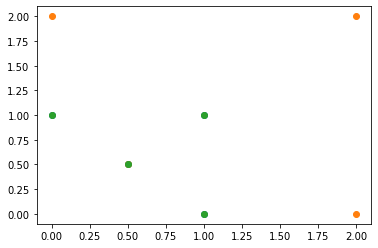

In [30]:
plt.scatter(*a)
plt.scatter(*b)
plt.scatter(*c)

In [36]:
tra = np.array([[0, 0, 1], [1/2, -1/2, 0]])
np.dot(g.T, tra.T)

array([[1. , 0. ],
       [0. , 1. ],
       [1. , 1. ],
       [0. , 0. ],
       [0.5, 0.5]])

In [121]:
def proc(arr):
    res_vec = list()
    for i in arr:
        if not res_vec:
            res_vec.append(i/np.dot(i, i))
        else:
            tmp = i.copy()
            for j in res_vec:
                tmp -=  j * np.dot(i, j)/np.dot(j, j)
            if (tmp != 0).any():
                res_vec.append(tmp/np.dot(tmp, tmp))
    return np.array(res_vec)
g = np.dot(transform_matrix[1], a) 
proc(g.T.copy())
transform_matrix

[array([[0, 0, 2],
        [0, 2, 0],
        [2, 0, 0]]),
 array([[ 1,  1,  0],
        [ 1, -1,  0],
        [ 0,  0,  1]]),
 array([[-2,  0,  0],
        [ 0, -2,  0],
        [ 0,  0, -1]])]

In [122]:
print(b.T)
a_prod = proc(b.T)
print(np.dot(b.T, a_prod.T))
for i in transform_matrix:
    print("*"*10)
    instance = np.dot(i, a).T
    product = proc(np.dot(i, a).T)
    
    print(np.dot(instance, product.T))

[[0.  0.  2. ]
 [0.  2.  0. ]
 [0.  2.  2. ]
 [0.  0.  0. ]
 [0.  0.5 0.5]]
[[1.   0.  ]
 [0.   1.  ]
 [1.   1.  ]
 [0.   0.  ]
 [0.25 0.25]]
**********
[[1.  0. ]
 [0.  1. ]
 [1.  1. ]
 [0.  0. ]
 [0.5 0.5]]
**********
[[1.  0. ]
 [0.  1. ]
 [1.  1. ]
 [0.  0. ]
 [0.5 0.5]]
**********
[[1.  0. ]
 [0.  1. ]
 [1.  1. ]
 [0.  0. ]
 [0.5 0.5]]


In [126]:
large_transform_matrix = [
    np.array([[1, 1, 0],
             [1, 0, 0], 
             [0, 0, 1]]),
]

In [127]:
print(a.T)
a_prod = proc(a.T)
print(np.dot(a.T, a_prod.T))
for i in large_transform_matrix:
    print("*"*10)
    instance = np.dot(i, a).T
    product = proc(np.dot(i, a).T)
    
    print(np.dot(instance, product.T))

[[0.  0.  1. ]
 [0.  1.  0. ]
 [0.  1.  1. ]
 [0.  0.  0. ]
 [0.  0.5 0.5]]
[[1.  0. ]
 [0.  1. ]
 [1.  1. ]
 [0.  0. ]
 [0.5 0.5]]
**********
[[1.  0. ]
 [0.  1. ]
 [1.  1. ]
 [0.  0. ]
 [0.5 0.5]]
